In [1]:
import pickle # Verisetlerinin notebook'a aktarılması
pickle_file_link = "/content/drive/MyDrive/Data"
X_train = pickle.load(open(f"{pickle_file_link}/X_train.pickle","rb"))
y_train = pickle.load(open(f"{pickle_file_link}/y_train.pickle","rb"))

X_test = pickle.load(open(f"{pickle_file_link}/X_test.pickle","rb"))
y_test = pickle.load(open(f"{pickle_file_link}/y_test.pickle","rb"))

X_val = pickle.load(open(f"{pickle_file_link}/X_val.pickle","rb"))
y_val = pickle.load(open(f"{pickle_file_link}/y_val.pickle","rb"))

In [2]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
model1 = Sequential() # Modelin oluşturulması
model1.add(Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu',  # Input boyutunun 28x28 olması ve grayscaled olması sebebiyle ilk katman şekli 28,28,1 olarak belirlendi.
                 input_shape = (28, 28, 1)))
model1.add(MaxPooling2D(pool_size = (5, 5)))

model1.add(Conv2D(filters = 64 , kernel_size = 5, padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (5, 5)))

model1.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 128)         204928    
                                                                 
 dropout (Dropout)           (None, 1, 1, 128)         0

In [4]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
hist1 = model1.fit(X_train, y_train, epochs = 50, batch_size = 64,validation_data = (X_val , y_val) )

Epoch 1/50
110/110 [==============================] - 13s 8ms/step - loss: 2.0429 - accuracy: 0.2189 - val_loss: 1.7300 - val_accuracy: 0.4021
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 1.7071 - accuracy: 0.3698 - val_loss: 1.5075 - val_accuracy: 0.4364
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 1.5051 - accuracy: 0.4465 - val_loss: 1.3258 - val_accuracy: 0.5258
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 1.3858 - accuracy: 0.4958 - val_loss: 1.2263 - val_accuracy: 0.5876
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 1.3069 - accuracy: 0.5246 - val_loss: 1.1643 - val_accuracy: 0.5911
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 1.2300 - accuracy: 0.5626 - val_loss: 1.1229 - val_accuracy: 0.6117
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 1.1863 - accuracy: 0.5757 - val_loss: 1.0740 - val_accuracy: 0.6082
Epoch

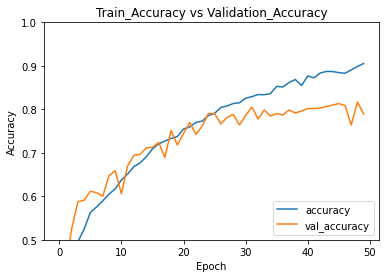

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['accuracy'], label='accuracy')
plt.plot(hist1.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train_Accuracy vs Validation_Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

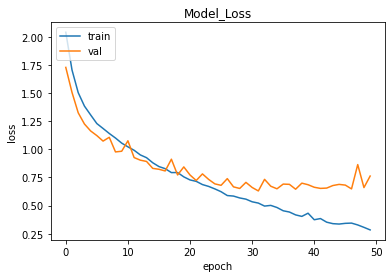

In [7]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

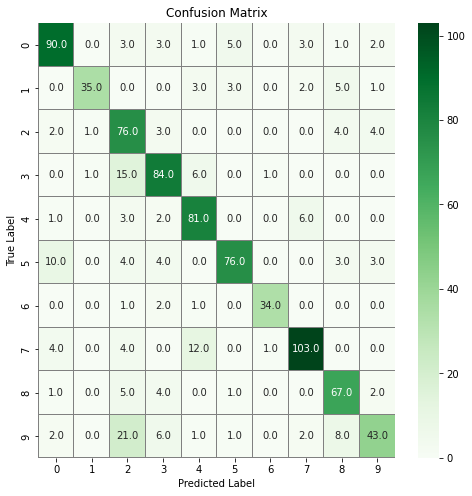

In [8]:
# confusion matrix
import seaborn as sns
import pandas as pd
import numpy as np
# Predict the values from the validation dataset
Y_pred = model1.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [9]:
model = Sequential() # Model için Hyperparameters Tunning işlemi
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',  # Input boyutunun 28x28 olması ve grayscaled olması sebebiyle ilk katman şekli 28,28,1 olarak belirlendi.
                 input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         409728    
                                                      

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
hist = model.fit(X_train, y_train, epochs = 50, batch_size = 64,validation_data = (X_val , y_val) )

Epoch 1/50
110/110 [==============================] - 4s 20ms/step - loss: 1.9898 - accuracy: 0.2248 - val_loss: 1.7033 - val_accuracy: 0.3322
Epoch 2/50
110/110 [==============================] - 1s 13ms/step - loss: 1.6425 - accuracy: 0.3768 - val_loss: 1.3871 - val_accuracy: 0.4914
Epoch 3/50
110/110 [==============================] - 1s 11ms/step - loss: 1.4029 - accuracy: 0.4925 - val_loss: 1.2579 - val_accuracy: 0.5189
Epoch 4/50
110/110 [==============================] - 1s 12ms/step - loss: 1.2138 - accuracy: 0.5589 - val_loss: 1.0586 - val_accuracy: 0.6208
Epoch 5/50
110/110 [==============================] - 1s 12ms/step - loss: 1.0887 - accuracy: 0.6115 - val_loss: 0.9280 - val_accuracy: 0.6701
Epoch 6/50
110/110 [==============================] - 1s 13ms/step - loss: 0.9771 - accuracy: 0.6565 - val_loss: 0.7677 - val_accuracy: 0.7354
Epoch 7/50
110/110 [==============================] - 1s 12ms/step - loss: 0.8655 - accuracy: 0.7028 - val_loss: 0.7460 - val_accuracy: 0.7514

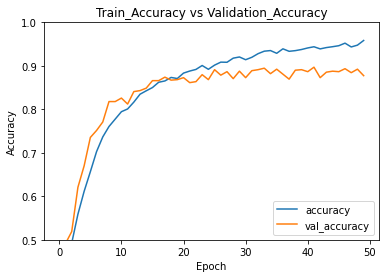

In [12]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train_Accuracy vs Validation_Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

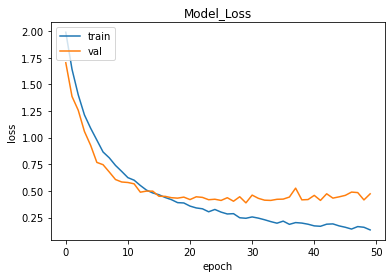

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

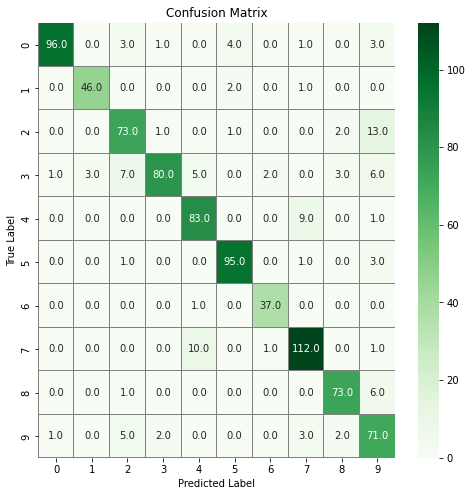

In [14]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 9ms/step - loss: 0.4417 - accuracy: 0.8879


[0.441660612821579, 0.8878718614578247]

In [16]:
prediction_result = model.predict(X_test[788].reshape(1,28,28,1))

In [17]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 4 with 0.8362773060798645 probability %
